## Introduction

n the US, the Senate votes on proposed legislation. Getting a bill passed by the Senate is a key step towards getting its provisions enacted. A majority vote is required to get a bill passed.

The results of these votes, known as roll call votes, are public, and available in a few places, including here. Read more about the US legislative system [here](https://en.wikipedia.org/wiki/Federal_government_of_the_United_States#Legislative_branch).

Senators typically vote in accordance with how their political party votes, known as voting along party lines. In the US, the 2 main political parties are the Democrats, who tend to be liberal, and the Republicans, who tend to be conservative. Senators can also choose to be unaffiliated with a party, and vote as Independents, although very few choose to do so.

114_congress.csv contains all of the results of roll call votes from the 114th Senate. Each row represents a single Senator, and each column represents a vote. A 0 in a cell means the Senator voted No on the bill, 1 means the Senator voted Yes, and 0.5 means the Senator abstained.

In [13]:
# Read the Dataset.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import KMeans

votes = pd.read_csv('114_congress.csv')
votes.head()

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
0,Alexander,R,TN,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Ayotte,R,NH,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,Baldwin,D,WI,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
3,Barrasso,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,Bennet,D,CO,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [14]:
# Count number of senators in each party.
print(votes['party'].value_counts())

# Find the average voting on each bill.
print(votes.mean())

R    54
D    44
I     2
Name: party, dtype: int64
00001    0.325
00004    0.575
00005    0.535
00006    0.945
00007    0.545
00008    0.415
00009    0.545
00010    0.985
00020    0.525
00026    0.545
00032    0.410
00038    0.480
00039    0.510
00044    0.460
00047    0.370
dtype: float64


## Calculate euclidean distance between senators.

In [15]:
# Calculate euclidean_distances.
print(euclidean_distances(votes.iloc[0,3:][np.newaxis,:], votes.iloc[1,3:][np.newaxis,:]))

# Calculate euclidean_distances between first and the third row.
distance = euclidean_distances(votes.iloc[0,3:][np.newaxis,:], votes.iloc[2,3:][np.newaxis,:])
distance

[[ 1.73205081]]


array([[ 3.31662479]])

## Initial Clustering

In [16]:
# We put in the number of clusters as 2 because the US legislations has 2 parties.
# We want to see if the clusters break along the party lines
kmeans_model = KMeans(n_clusters=2, random_state=1)

# The fit_transform method calculates the distance of each row(senator) to each cluster.
# Lower the distance, more closer the senator is to a cluster.
senator_distances = kmeans_model.fit_transform(votes.iloc[:, 3:])
senator_distances[:10]

array([[ 3.12141628,  1.3134775 ],
       [ 2.6146248 ,  2.05339992],
       [ 0.33960656,  3.41651746],
       [ 3.42004795,  0.24198446],
       [ 1.43833966,  2.96866004],
       [ 0.33960656,  3.41651746],
       [ 3.42004795,  0.24198446],
       [ 0.33960656,  3.41651746],
       [ 3.42004795,  0.24198446],
       [ 0.31287498,  3.30758755]])

## Exploring Clusters

In [17]:
# labels is as array that stores 0 or 1.
# 0 and 1 are the cluster ids
# The cluster ids are assigned according to the senator distances.
labels = kmeans_model.labels_
labels

array([1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0], dtype=int32)

In [18]:
# Let us see if the clusters break along party lines.
matrix = pd.crosstab(labels, votes['party'])
matrix

party,D,I,R
row_0,,,
0,41,2,0
1,3,0,54


We can see that all Republicans are alike and they belong to the same cluster(1). But there are 3 Democrats who are more like Republicans and belong to cluster(1).

## Exploring Democratic Outliers.

In [19]:
democ_outliers = (labels==1) & (votes['party']=='D')
votes[democ_outliers]

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047
42,Heitkamp,D,ND,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
56,Manchin,D,WV,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
74,Reid,D,NV,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5


In [20]:
labels[[42,56,74]]

array([1, 1, 1], dtype=int32)

In [21]:
senator_distances[[42,56,74],:]

array([[ 2.3965057 ,  2.27626086],
       [ 2.78266771,  1.88408719],
       [ 1.77652196,  1.72996156]])

## Plotting the clusters

Text(0,0.5,'Disance from cluster-1')

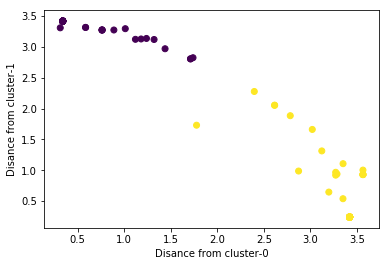

In [22]:
plt.scatter(senator_distances[:,0], senator_distances[:,1], c=labels)
plt.xlabel('Disance from cluster-0')
plt.ylabel('Disance from cluster-1')

## Finding the most extreme senators

The most extreme Senators are those who are the furthest away from one cluster. For example, a radical Republican would be as far from the Democratic cluster as possible. Senators who are in between both clusters are more moderate, as they fall in between the views of the two parties.

In [23]:
extremist_distances = (senator_distances ** 3).sum(axis=1)
votes['extremism'] = extremist_distances
votes = votes.sort_values('extremism', ascending=False)
votes.head(10)

,name,party,state,00001,00004,00005,00006,00007,00008,00009,00010,00020,00026,00032,00038,00039,00044,00047,extremism
98,Wicker,R,MS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.250476
53,Lankford,R,OK,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
69,Paul,R,KY,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
80,Sasse,R,NE,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
26,Cruz,R,TX,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,46.046873
48,Johnson,R,WI,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
47,Isakson,R,GA,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
65,Murkowski,R,AK,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
64,Moran,R,KS,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
30,Enzi,R,WY,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,40.017540
